# PANDAS 4EVER

Import 

- pandas under the alias pd 
- datetime under the alias dt
- mayplotlib.pyplot under the alias plt

Run 
- %matplotlib inline

Read in as data
- the csv `FoodServiceData_23_0` in the data folder and assign to the variable `food`

In [218]:

#data manip
import pandas as pd
import datetime as dt

#data viz
import matplotlib.pyplot as plt

#jn to render matplotlib
%matplotlib inline

food = pd.read_csv('data/FoodServiceData_23_0.csv')

## Data Exploration and Cleaning

The first question to ask yourself of a dataset: "what is this dataset treating as an observation?"

Think of an "observation" as an "event" or a "subject".  For example, an observation could be a:

- specific subject, like an individual person, with features about that person's characteristics or behaviors: medical data like `blood pressure` or `test results`, econ / sociological data like `yearly income` or `crime rate of neighorhood in which they live`, behavioral data like what products they purchased)

- aggregated subject, like in the Boston housing dataset, where each row was a suburb/town.  Features can be aggregated statistics about things within the region - like `crime rate` or `median house value` - or it can be about the specific region itself, such as `distance to Hahvahd Yahd`

- event, where each row isn't tied to a specific identity but instead tied to a specific action that occured. Often, these types of datasets will have a number of features that act as keys that distinguish events from each other, as well as features containing data about the event. For example, a store with multiple locations might have a dataset of "transactions", where the key features for each row are `Store`, `Time` and `Transaction ID`, with other features `Item Purchased`, `Payment Method`, `Coupons Used`, etc.  Notice that the same type of data - purchasing items - can be organized as either features of a "person" or an "event".

Figuring out which "observation" makes a row is an important part of figuring out how to analyze a dataset.  

Take a look at the first five rows.  How does this dataset appear to be organized?  What is an "observation"?  What are the features?

In [219]:
food.head(5)

,EstablishmentID,InspectionID,EstablishmentName,PlaceName,Address,Address2,City,State,Zip,TypeDescription,Latitude,Longitude,InspectionDate,Score,Grade,NameSearch,Intersection
0,73002,1386666,JU-LI CREATIONS,NaN,8621 HI VIEW LN,NaN,LOUISVILLE,KY,40272,CATERERS,38.1212,0.0000,2018-06-08 00:00:00,100.0,A,JU-LI CREATIONS,NaN
1,41292,1386726,OLE HICKORY PIT BAR B Q,NaN,6106 OLD SHEPHERDSVILLE RD,NaN,LOUISVILLE,KY,40228,FOOD SERVICE,38.1628,-85.6604,2018-05-21 00:00:00,NaN,NaN,OLE HICKORY PIT BAR B Q,NaN
2,41292,1386727,OLE HICKORY PIT BAR B Q,NaN,6106 OLD SHEPHERDSVILLE RD,NaN,LOUISVILLE,KY,40228,FOOD SERVICE,38.1628,-85.6604,2018-06-05 00:00:00,NaN,NaN,OLE HICKORY PIT BAR B Q,NaN
3,90821,1386729,SONIC DRIVE-IN,NaN,8600 AMBROSSE LN,NaN,LOUISVILLE,KY,40299,FOOD SERVICE,38.1961,-85.6030,2018-06-07 00:00:00,NaN,NaN,SONIC DRIVE-IN,NaN
4,75560,1386745,PROOF ON MAIN,NaN,702 W MAIN ST,NaN,LOUISVILLE,KY,40202,FOOD SERVICE,38.2570,-85.7618,2018-06-12 00:00:00,100.0,A,PROOF ON MAIN,NaN


Which have nulls in them?

In [220]:

food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9809 entries, 0 to 9808
Data columns (total 17 columns):
EstablishmentID      9809 non-null int64
InspectionID         9809 non-null int64
EstablishmentName    9809 non-null object
PlaceName            0 non-null float64
Address              9809 non-null object
Address2             0 non-null float64
City                 9809 non-null object
State                9809 non-null object
Zip                  9809 non-null int64
TypeDescription      9809 non-null object
Latitude             9809 non-null float64
Longitude            9809 non-null float64
InspectionDate       9809 non-null object
Score                8090 non-null float64
Grade                6271 non-null object
NameSearch           9809 non-null object
Intersection         0 non-null float64
dtypes: float64(6), int64(3), object(8)
memory usage: 1.3+ MB


#### There are 3 features that are all nulls, let's get rid of them.

**First**, use a method to drop a specific column.  **Then**, for the other two, use a method that will drop all columns that are completely null. 

Check that only those columns were dropped.

In [221]:

food.drop('PlaceName', axis=1, inplace=True)

food.dropna(axis=1, how='all', inplace=True)

food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9809 entries, 0 to 9808
Data columns (total 14 columns):
EstablishmentID      9809 non-null int64
InspectionID         9809 non-null int64
EstablishmentName    9809 non-null object
Address              9809 non-null object
City                 9809 non-null object
State                9809 non-null object
Zip                  9809 non-null int64
TypeDescription      9809 non-null object
Latitude             9809 non-null float64
Longitude            9809 non-null float64
InspectionDate       9809 non-null object
Score                8090 non-null float64
Grade                6271 non-null object
NameSearch           9809 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 1.0+ MB


#### For now, let's only look at rows w/ values in the `Score` column

Drop all rows w/ nulls for `Score`.  Make sure you print out how many rows there are pre-drop, how many you dropped, and how many there are after dropping!

In [222]:

print(f'# of rows predrop: {len(food)}')
print(f'# of nulls to drop: {food["Score"].isnull().sum()}')
food.drop(
    food[
        food['Score'].isnull()==True
    ].index, 
    axis=0, 
    inplace=True
)
print(f'# of rows postdrop: {len(food)}')

# of rows predrop: 9809
# of nulls to drop: 1719
# of rows postdrop: 8090


#### Looks like there might be a relationship in nulls b/t `Score` and `Grade`

Do all the nulls of `Score` also have nulls for `Grade`? Vice versa?

In [223]:

mask = (
    (food.Score.notnull()) &
    (food.Grade.isnull())
)

print(f'Obs w/ Score and no Grade: {len(food[mask])}')

mask = (
    (food.Score.isnull()) &
    (food.Grade.notnull())
)

print(f'Obs w/ Grade and no Score: {len(food[mask])}')

Obs w/ Score and no Grade: 1819
Obs w/ Grade and no Score: 0


#### Let's see if we can fill in those `Grade` values from `Score`

How does `Grade` map onto `Score`?  Let's find the rows that have both `Grade` and `Score` values, group by `Grade`, and see the min, max and mean for `Score` for each `Grade`

In [224]:

food_grade = food[food['Grade'].notnull()==True]

food_grade.groupby('Grade')['Score'].min()
food_grade.groupby('Grade')['Score'].max()
food_grade.groupby('Grade')['Score'].mean()
food_grade.groupby('Grade')['Score'].agg(['count', min,'mean', 'std','median',max])

,count,min,mean,std,median,max
Grade,,,,,,
A,5986,87.0,97.655028,2.466370,98.0,100.0
B,32,90.0,98.531250,2.047569,99.0,100.0
C,253,58.0,84.837945,7.896241,87.0,96.0


#### Whelp.  Let's just drop `Grade` then

In [199]:

food.drop('Grade', axis=1, inplace=True)

#### Let's familiarize ourselves with the levels of the categories for the features that are object types

In [225]:

for column in food.select_dtypes('object'):
    print(food[column].value_counts())

SUBWAY                    76
MCDONALD'S                57
WENDYS                    40
EL NOPAL                  37
TACO BELL                 36
                          ..
FISCAL COURT SNACK BAR     1
DANA HOLDING CO.           1
CANDLEWOOD SUITES          1
HOLY SPIRIT CONCESSION     1
NEIGHBORHOOD MART          1
Name: EstablishmentName, Length: 3241, dtype: int64
1 ARENA PLAZA          99
937 PHILLIPS LN        98
2800 S FLOYD ST        92
5000 SHELBYVILLE RD    63
700 CENTRAL AVE        49
                       ..
6109 BARDSTOWN RD       1
900 E MARKET ST         1
700 W OAK ST            1
6900 DIXIE HWY          1
7207 FEGENBUSH LN       1
Name: Address, Length: 3049, dtype: int64
LOUISVILLE       7914
PROSPECT          111
FAIRDALE           52
MASONIC HOME        5
PROPSECT            4
HARRODS CREEK       4
Name: City, dtype: int64
KY    8090
Name: State, dtype: int64
FOOD SERVICE                                  4699
RETAIL-FOOD  10,000 SQ FT OR LESS             1378
FOOD 

#### Do you see some columns that might be duplicated?

Test to see if they're identical

In [226]:

(food.EstablishmentName==food.NameSearch).value_counts()

True    8090
dtype: int64

#### Of the two identical columns, drop the one that comes second

In [227]:
food.drop('NameSearch', axis=1, inplace=True)

#### Let's inspect the `InspectionDate` column

What type is it?

In [228]:

type(food['InspectionDate'][0])

str

Convert the column to datetime object

In [230]:

food['InspectionDate'] = pd.to_datetime(food['InspectionDate'])

food['InspectionDate'].dtype

dtype('<M8[ns]')

## Data Manipulation

#### Let's keep working with that `InspectionDate` column

Create a column that shows the day of inspection

In [232]:

food['InspectionDay'] = food['InspectionDate'].dt.day_name()

food.head()

,EstablishmentID,InspectionID,EstablishmentName,Address,City,State,Zip,TypeDescription,Latitude,Longitude,InspectionDate,Score,Grade,InspectionDay
0,73002,1386666,JU-LI CREATIONS,8621 HI VIEW LN,LOUISVILLE,KY,40272,CATERERS,38.1212,0.0000,2018-06-08,100.0,A,Friday
4,75560,1386745,PROOF ON MAIN,702 W MAIN ST,LOUISVILLE,KY,40202,FOOD SERVICE,38.2570,-85.7618,2018-06-12,100.0,A,Tuesday
14,90128,1380419,QDOBA #2632,312 S 4TH ST,LOUISVILLE,KY,40202,FOOD SERVICE,38.2534,-85.7572,2018-05-18,94.0,A,Friday
15,88441,1380420,POTTER'S HOUSE CHILDCARE ENRICHMENT,314 S WENZEL ST,LOUISVILLE,KY,40204,FOOD SERVICE (DAY CARE / CHILD CARE CENTER,38.2508,-85.7345,2018-05-18,93.0,A,Friday
16,93095,1380462,MANSION MILLIONAIRE 6,700 CENTRAL AVE,LOUISVILLE,KY,40208,FOOD SERVICE,38.2023,-85.7701,2018-05-18,100.0,A,Friday


#### Get mean score per day

In [233]:
food.groupby('InspectionDate')['Score'].mean()

InspectionDate
2018-05-10    96.642857
2018-05-11    96.652174
2018-05-14    96.925926
2018-05-15    96.735294
2018-05-16    96.620690
                ...    
2019-05-03    98.333333
2019-05-06    97.508772
2019-05-07    97.357143
2019-05-08    97.894737
2019-05-09    97.700000
Name: Score, Length: 275, dtype: float64

#### Graph!

Give it a title "Average Inspection Score by Date"

Label the axes "Date" and "Avg Inspection Score"

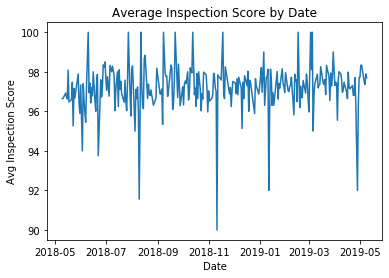

In [234]:
date_means = food.groupby('InspectionDate')['Score'].mean()

fig, ax = plt.subplots()

ax.plot(date_means.index, date_means)
ax.set_xlabel('Date')
ax.set_ylabel('Avg Inspection Score')
ax.set_title('Average Inspection Score by Date')
plt.show()

#### Let's say we wanted to compare it to a city that had scores that dropped down to 80

Re-set the scale of the y-axis so it starts at 75 and ends at 100.  Re-graph.

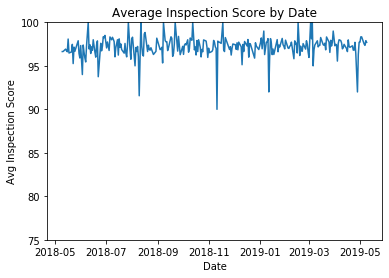

In [235]:
date_means = food.groupby('InspectionDate')['Score'].mean()

fig, ax = plt.subplots()

#chart data
ax.plot(date_means.index, date_means)
ax.set_ylim(75,100)

#chart metadata
ax.set_xlabel('Date')
ax.set_ylabel('Avg Inspection Score')
ax.set_title('Average Inspection Score by Date')
plt.show()

Let's see how `Score` breaks down by `TypeDescription`.

Create two columns, one whose value is the mean `Score` of the `TypeDescription` value for that row, one whose value is the std of `Score`
- Groupby `TypeDescription` and calc the mean and std of `Score` 
- Merge with `Food` on `TypeDescription` value

In [236]:

type_means = food.groupby('TypeDescription')['Score'].agg(['mean', 'std'])

type_means = type_means.rename(columns={'mean':'TypeDescription_Mean','std':'TypeDescription_Std'})
# type_means.rename('TypeDescription Mean', inplace=True)

food = pd.merge(food, 
         type_means, 
         left_on='TypeDescription', 
         right_index=True,
        )

food.head()

,EstablishmentID,InspectionID,EstablishmentName,Address,City,State,Zip,TypeDescription,Latitude,Longitude,InspectionDate,Score,Grade,InspectionDay,TypeDescription_Mean,TypeDescription_Std
0,73002,1386666,JU-LI CREATIONS,8621 HI VIEW LN,LOUISVILLE,KY,40272,CATERERS,38.1212,0.0000,2018-06-08,100.0,A,Friday,98.305882,2.19319
45,102648,1387088,DINING WITH GABOR AND MORE,1812 W MUHAMMAD ALI BLVD,LOUISVILLE,KY,40203,CATERERS,38.2535,-85.7816,2018-06-12,99.0,A,Tuesday,98.305882,2.19319
58,93324,1383273,GITA'S CATERING AT HOLIDAY INN,6551 PARAMOUNT PARK DR,LOUISVILLE,KY,40213,CATERERS,38.1541,-85.7122,2018-05-30,96.0,A,Wednesday,98.305882,2.19319
114,70057,1378470,SINCERELY YOURS CATERING,1515 CYPRESS ST,LOUISVILLE,KY,40211,CATERERS,38.2300,0.0000,2018-05-10,99.0,A,Thursday,98.305882,2.19319
134,86636,1378944,GRACIOUS PLENTY CATERING,2900 BROWNSBORO RD,LOUISVILLE,KY,40206,CATERERS,38.2600,-85.6881,2018-05-14,100.0,A,Monday,98.305882,2.19319


Calculate a new column that's difference between an inspections's `Score` and its `TypeDescription_Mean` in units of `TypeDescription_Std`

In [237]:

food['TypeDescription_Spread'] = (
    (food['Score']-food['TypeDescription_Mean'])/food['TypeDescription_Std']
    )


food.head()

,EstablishmentID,InspectionID,EstablishmentName,Address,City,State,Zip,TypeDescription,Latitude,Longitude,InspectionDate,Score,Grade,InspectionDay,TypeDescription_Mean,TypeDescription_Std,TypeDescription_Spread
0,73002,1386666,JU-LI CREATIONS,8621 HI VIEW LN,LOUISVILLE,KY,40272,CATERERS,38.1212,0.0000,2018-06-08,100.0,A,Friday,98.305882,2.19319,0.772444
45,102648,1387088,DINING WITH GABOR AND MORE,1812 W MUHAMMAD ALI BLVD,LOUISVILLE,KY,40203,CATERERS,38.2535,-85.7816,2018-06-12,99.0,A,Tuesday,98.305882,2.19319,0.316488
58,93324,1383273,GITA'S CATERING AT HOLIDAY INN,6551 PARAMOUNT PARK DR,LOUISVILLE,KY,40213,CATERERS,38.1541,-85.7122,2018-05-30,96.0,A,Wednesday,98.305882,2.19319,-1.051383
114,70057,1378470,SINCERELY YOURS CATERING,1515 CYPRESS ST,LOUISVILLE,KY,40211,CATERERS,38.2300,0.0000,2018-05-10,99.0,A,Thursday,98.305882,2.19319,0.316488
134,86636,1378944,GRACIOUS PLENTY CATERING,2900 BROWNSBORO RD,LOUISVILLE,KY,40206,CATERERS,38.2600,-85.6881,2018-05-14,100.0,A,Monday,98.305882,2.19319,0.772444


Find the values of `EstablishmentName` of the 20 inspections whose `Score` most exceeds its `TypeDescrition_Mean`

In [239]:

(
    food
    .sort_values('TypeDescription_Spread', ascending=False)
    [['EstablishmentName', 'TypeDescription']]
    .reset_index(drop=True)
    [0:20]
)

,EstablishmentName,TypeDescription
0,KROGER L-360,"RETAIL-FOOD 10,001 SQ FT OR OVER"
1,KROGER L-764,"RETAIL-FOOD 10,001 SQ FT OR OVER"
2,KROGER L-707,"RETAIL-FOOD 10,001 SQ FT OR OVER"
3,KROGER L-346,"RETAIL-FOOD 10,001 SQ FT OR OVER"
4,KROGER L-379,"RETAIL-FOOD 10,001 SQ FT OR OVER"
5,KROGER L-707,"RETAIL-FOOD 10,001 SQ FT OR OVER"
6,MEIJER #166,"RETAIL-FOOD 10,001 SQ FT OR OVER"
7,TARGET T-2473 STARBUCKS,"RETAIL-FOOD 10,001 SQ FT OR OVER"
8,TARGET T-2473 STARBUCKS,"RETAIL-FOOD 10,001 SQ FT OR OVER"
9,KROGER L-389,"RETAIL-FOOD 10,001 SQ FT OR OVER"


# Import Libraries

# SQL

![](index_files/schema.png)

Open a connection to ```chinook.db```

In [2]:
conn = sqlite3.connect('./data/chinook.db')

## 1.

>Select all column and rows from the genres table

In [4]:
QUERY = '''SELECT * FROM genres'''
pd.read_sql(QUERY, conn)

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


## 2.

1. Select the ```City``` column from the ```customers``` table 
2. Select the ```Name``` column from the ```genres``` table –– aliased as "Genre" .
3. Create a column that counts the number of purchases made from each city for Blues music.
4. Sort the results in descending order.
5. Return the top ten cities.

In [32]:
QUERY = '''SELECT customers.City,
                  COUNT(customers.City) as Count,
                  genres.Name as Genre
           FROM customers
           JOIN invoices
           USING(CustomerId)
           JOIN invoice_items
           USING(InvoiceId)
           JOIN tracks
           USING(TrackId)
           JOIN genres
           USING(GenreId)
           WHERE Genre = "Blues"
           GROUP BY customers.City
           ORDER BY Count Desc
           LIMIT 10'''
pd.read_sql(QUERY, conn)

,City,Count,Genre
0,Stuttgart,9,Blues
1,Brasília,6,Blues
2,New York,6,Blues
3,Berlin,5,Blues
4,Amsterdam,4,Blues
5,Rome,4,Blues
6,Cupertino,3,Blues
7,Delhi,3,Blues
8,Mountain View,3,Blues
9,Budapest,2,Blues


## 3.

1. Select the ```FirstName``` column from the ```customers``` table
2. Select the ```LastName``` column from the ```customers``` table
3. Select the ```Email``` column from the ```customers``` table
4. Create a new column that is the multiplication of the ```UnitPrice``` and ```Quantity``` columns from the ```invoice_items``` table. 
    - Alias this column as ```Total```.
5. Use ```GROUP BY```  to return the sum total for each customer
6. Sort in descending order
7. Return the top 20 highest spending customers.

In [46]:
QUERY = '''SELECT customers.FirstName,
                  customers.LastName,
                  customers.Email,
                  SUM(invoice_items.UnitPrice * 
                      invoice_items.Quantity) as Total
                      
           FROM customers
           JOIN invoices
           USING(CustomerId)
           JOIN invoice_items
           USING(InvoiceId)
           GROUP BY Email
           ORDER BY Total Desc
           LIMIT 20'''

pd.read_sql(QUERY, conn)

,FirstName,LastName,Email,Total
0,Helena,Holý,hholy@gmail.com,49.62
1,Richard,Cunningham,ricunningham@hotmail.com,47.62
2,Luis,Rojas,luisrojas@yahoo.cl,46.62
3,Hugh,O'Reilly,hughoreilly@apple.ie,45.62
4,Ladislav,Kovács,ladislav_kovacs@apple.hu,45.62
5,Fynn,Zimmermann,fzimmermann@yahoo.de,43.62
6,Frank,Ralston,fralston@gmail.com,43.62
7,Julia,Barnett,jubarnett@gmail.com,43.62
8,Victor,Stevens,vstevens@yahoo.com,42.62
9,Astrid,Gruber,astrid.gruber@apple.at,42.62


# API


>For this review, we will take a look at three separate APIs and work through the process of writing requests based on each APIs documentation.

## Public Holiday API

>This API provides public holiday information for more than 90 countries. 

>The API's Documentation can be found [here](https://date.nager.at/swagger/index.html)



**Write a request to return all available countries**

In [50]:
REQUEST =  "https://date.nager.at/Api/v2/AvailableCountries"
req = requests.get(REQUEST).json()
req[:3]

[{'key': 'AD', 'value': 'Andorra'},
 {'key': 'AL', 'value': 'Albania'},
 {'key': 'AR', 'value': 'Argentina'}]

**Convert the results of our request to a DataFrame**

In [52]:
countries = pd.DataFrame(req)

**What is the key for the United States?**

In [58]:
us_code = countries[countries.value == 'United States'].key.values[0]

**Make a request to the API that returns the public holidays for the United States**

In [64]:
REQUEST = "https://date.nager.at/Api/v2/PublicHolidays/2019/{}".format(us_code)
us = requests.get(REQUEST).json()
us[:2]

[{'date': '2019-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'},
 {'date': '2019-01-21',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'type': 'Public'}]

**Convert ```us``` to a DataFrame**

In [67]:
us = pd.DataFrame(us)

## iTunes API

Documentation for this API can be found [here](https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/)

Submit a request to the iTunes API that returns data on Harry Potter Audio Books

In [140]:
SEARCH_TERM = 'Harry Potter'
MEDIA_TYPE = 'audiobook'
REQUEST = 'https://itunes.apple.com/search?term={}&entity={}'.format(SEARCH_TERM, MEDIA_TYPE)
req = requests.get(REQUEST).json()

### Level Up

Using the data from the Harry Potter Audio Books request, collect the artistId for each entry and use those IDs to make a single ```https://itunes.apple.com/lookup?id={}&entity=audiobooks&sort=recent``` request. 

To do this:
- Every id should be added to a string
- Each id should be followed by a comma. ie ```id1,id2,id3,id4```
    - The final id should not be followed by a comma
- No id should be added to the string more than once.

In [141]:
ids = []
ARTIST_IDS = ''
for result in req['results']:
    id_ = str(result['artistId'])
    if id_ not in ids: 
        ARTIST_IDS += id_ + ','
        ids.append(id_)
        
if ARTIST_IDS[-1] == ',':
    ARTIST_IDS = ARTIST_IDS[:-1]

In [143]:
REQUEST = 'https://itunes.apple.com/lookup?id={}&entity=audiobook&sort=recent'.format(ARTIST_IDS)
req = requests.get(REQUEST).json()

number_of_results = req['resultCount']
print('Number of results:', number_of_results)

Number of results: 123
